In [1]:
import pandas as pd
import glob
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.json import json_normalize
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 200)

In [2]:
df=pd.read_csv('March.csv')
orders=pd.read_csv('orders march 2023.csv')

In [3]:
orders.rename(columns={'id':'order_id'},inplace=True)

In [4]:
orders

,order_id,amount,amount_paid,amount_due,currency,receipt,offer_id,status,attempts,notes,created_at
0,order_LMCflpIHjmvNTL,1095.0,1095.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Indrani Jafar"",""email"":""ani.doley@gmail.com"",""towers"":""Lodha World towers"",""apartment_no"":""1001w"",""phone"":""9820108861""}",01/03/2023 14:32:11
1,order_LNtElhpKBXlwyQ,2188.0,2188.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Parul Kumar"",""email"":""2014parulkumar@gmail.com"",""towers"":""Vivarea A"",""apartment_no"":""A3003"",""phone"":""9717836663""}",05/03/2023 20:49:27
2,order_LNtmBDvN4NRZKH,3395.0,0.0,3395.0,INR,NaN,NaN,attempted,1,"{""name"":""Michelle Baptist"",""email"":""michbaptist@gmail.com"",""towers"":""Vivarea D"",""apartment_no"":""803"",""phone"":""09820605121""}",05/03/2023 21:21:05
3,order_LOs3BS7KKA1RXp,1795.0,1795.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Minu Agrawal"",""email"":""minuagrawal0707@gmail.com"",""apartment"":""3903"",""towers"":""Vivarea B"",""phone"":""9820083648""}",08/03/2023 08:18:48
4,order_LOsTRfJcWV3QLU,1515.0,1515.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""JASMA KAPADIA"",""email"":""jasmak999@yahoo.com"",""towers"":""Lodha Bellissimo"",""apartment_no"":""C3101"",""phone"":""9820038207""}",08/03/2023 08:43:39
...,...,...,...,...,...,...,...,...,...,...,...
101,order_LXk8M9QFueRewO,520.0,0.0,520.0,INR,NaN,NaN,attempted,1,"{""name"":""Aniish"",""email"":""Anish24@gmail.com"",""towers"":""Othrs"",""apartment_no"":""2501"",""phone"":""9999999999""}",30/03/2023 18:25:09
102,order_LXkEWQe1IlugEj,268.0,0.0,268.0,INR,NaN,NaN,attempted,1,"{""name"":""Aniish"",""email"":""Anish24@gmail.com"",""towers"":""Others"",""apartment_no"":""2501"",""phone"":""9999999999""}",30/03/2023 18:31:00
103,order_LXlGaKgLd4PDLN,409.0,409.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Ruchi Wahi "",""email"":""wahiruchi80@gmail.com"",""towers"":""Lodha Bellisimo"",""apartment_no"":""502"",""phone"":""9833951659""}",30/03/2023 19:31:38
104,order_LXlR7AYFlpPoq3,194.0,194.0,0.0,INR,NaN,NaN,paid,1,"{""name"":""Ruchi Wahi "",""email"":""wahiruchi80@gmail.com"",""towers"":""Lodha Bellisimo"",""apartment_no"":""502"",""phone"":""9833951659""}",30/03/2023 19:41:37


In [5]:
orders['name']=orders['notes'].str.split(',').str[0].str.split('"').str[3]
orders['email']=orders['notes'].str.split(',').str[1].str.split('"').str[3]


In [6]:
orders.drop(columns=['amount','amount_paid','amount_due','currency','receipt','offer_id','status','attempts','notes','created_at'],inplace=True)

In [7]:
orders

,order_id,name,email
0,order_LMCflpIHjmvNTL,Indrani Jafar,ani.doley@gmail.com
1,order_LNtElhpKBXlwyQ,Parul Kumar,2014parulkumar@gmail.com
2,order_LNtmBDvN4NRZKH,Michelle Baptist,michbaptist@gmail.com
3,order_LOs3BS7KKA1RXp,Minu Agrawal,minuagrawal0707@gmail.com
4,order_LOsTRfJcWV3QLU,JASMA KAPADIA,jasmak999@yahoo.com
...,...,...,...
101,order_LXk8M9QFueRewO,Aniish,Anish24@gmail.com
102,order_LXkEWQe1IlugEj,Aniish,Anish24@gmail.com
103,order_LXlGaKgLd4PDLN,Ruchi Wahi,wahiruchi80@gmail.com
104,order_LXlR7AYFlpPoq3,Ruchi Wahi,wahiruchi80@gmail.com


In [11]:
orders.isnull().sum()

order_id    0
name        6
email       6
dtype: int64

In [55]:
orders[orders['name'].isnull()]

,order_id,name,email
41,order_LSpiLwo7SWF1eG,NaN,NaN
53,order_LUDRAKYryZj1U1,NaN,NaN
69,order_LW8jktTCy9TgDn,NaN,NaN
85,order_LWuImUpsvK8ndD,NaN,NaN
99,order_LXbvGVrsfQxP9X,NaN,NaN
105,order_LXyOrJhPpo0j3m,NaN,NaN


In [8]:
combined_data=pd.merge(df,orders,on='order_id',how="left")

In [57]:
combined_data[combined_data['name'].isnull()]['order_id']

526    order_LYNixREtZ5yK9S
527    order_LYNixREtZ5yK9S
528    order_LYNixREtZ5yK9S
529    order_LYNixREtZ5yK9S
530    order_LZ9Kz2lvdB67Di
               ...         
768    order_LcQniDYiQ2z4mm
769    order_LcTW0chbf0F27A
770    order_LcTW0chbf0F27A
771    order_LcTW0chbf0F27A
772    order_LcTW0chbf0F27A
Name: order_id, Length: 247, dtype: object

In [14]:
combined_data[combined_data['name'].isnull()]['item payment amount'].sum()

45749.0

In [9]:
combined_data.isnull().sum()

payment page id           0
payment page title        0
payment date              0
order_id                  0
item name                 0
item amount               0
item quantity             0
item payment amount       0
total payment amount      0
currency                  0
payment status            0
payment id                0
name                    247
email                   247
dtype: int64

In [15]:
#combined_data.dropna(subset=['name'],inplace=True)

In [16]:
combined_data[combined_data['name'].isnull()]

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount,total payment amount,currency,payment status,payment id,name,email
526,pl_LY73b5MB2U0zre,FRUIT BASKET APRIL 3,01/04/2023 09:08:57,order_LYNixREtZ5yK9S,Watermelon,155.0,1,155.0,1958.0,INR,captured,pay_LYNj2aQgPQBk94,NaN,NaN
527,pl_LY73b5MB2U0zre,FRUIT BASKET APRIL 3,01/04/2023 09:08:57,order_LYNixREtZ5yK9S,PEAR 1KG,300.0,1,300.0,1958.0,INR,captured,pay_LYNj2aQgPQBk94,NaN,NaN
528,pl_LY73b5MB2U0zre,FRUIT BASKET APRIL 3,01/04/2023 09:08:57,order_LYNixREtZ5yK9S,ELAICHI BANANA 1DOZEN,118.0,1,118.0,1958.0,INR,captured,pay_LYNj2aQgPQBk94,NaN,NaN
529,pl_LY73b5MB2U0zre,FRUIT BASKET APRIL 3,01/04/2023 09:08:57,order_LYNixREtZ5yK9S,DEVGHAD HAPUS 1DOZ,1385.0,1,1385.0,1958.0,INR,captured,pay_LYNj2aQgPQBk94,NaN,NaN
530,pl_LY73b5MB2U0zre,FRUIT BASKET APRIL 3,03/04/2023 07:43:44,order_LZ9Kz2lvdB67Di,POMEGRANATE 1KG,350.0,1,350.0,3210.0,INR,captured,pay_LZ9LEelMfj6xnJ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 14:45:33,order_LcQniDYiQ2z4mm,PINE NUTS 100G,690.0,2,1380.0,2830.0,INR,captured,pay_LcQnnxHJBbg7WK,NaN,NaN
769,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,DRIED CRANBERRIES 500G,950.0,1,950.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
770,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,GOLDEN RASINS 500G,500.0,1,500.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
771,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,PINE NUTS 100G,690.0,1,690.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN


In [17]:
combined_data.rename(columns={'item payment amount':'item payment amount(INR) '},inplace=True)


In [18]:
combined_data_copy=combined_data.copy()

In [19]:
combined_data_copy.tail()

,payment page id,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,currency,payment status,payment id,name,email
768,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 14:45:33,order_LcQniDYiQ2z4mm,PINE NUTS 100G,690.0,2,1380.0,2830.0,INR,captured,pay_LcQnnxHJBbg7WK,NaN,NaN
769,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,DRIED CRANBERRIES 500G,950.0,1,950.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
770,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,GOLDEN RASINS 500G,500.0,1,500.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
771,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,PINE NUTS 100G,690.0,1,690.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN
772,pl_LY7AzRb1PEpHAa,"DRYFRUITS, SEEDS, NUTS APR 10",11/04/2023 17:24:55,order_LcTW0chbf0F27A,PECAN NUTS 200G,580.0,1,580.0,2720.0,INR,captured,pay_LcTW9mzdT4tMlB,NaN,NaN


### checking unique values and their count in each columns

In [20]:
combined_data_copy['payment page id'].nunique()

29

In [21]:
combined_data_copy['payment page id'].value_counts()

pl_LY7512QtLhD6PS    81
pl_LY79xAIHRTdwp6    58
pl_LY78jy2CdBAqXN    56
pl_LUpMNTGqQzhv2d    55
pl_LNtBVPTSY3AYj4    50
pl_LY73b5MB2U0zre    42
pl_LT0SvLAmJtgU7F    39
pl_LUpP1CyqDlA2pz    38
pl_LUr491RrbcdgM6    38
pl_LVLibrBCoAOON0    33
pl_LVLk6qAX6fuZNy    30
pl_LQUC2hjrdoWXk4    28
pl_LVLjLWjg2K1nJv    28
pl_LPlSDDhadzfvYs    27
pl_LXIuXwgqNMOwCy    26
pl_LOrv1jOesWWJp8    24
pl_LXJGIJdml5ePIG    23
pl_LRha2NUBfOKwQR    16
pl_LQUZVwgRjUhtqw    12
pl_LVLkyAhTfWqWLS    10
pl_LY7AzRb1PEpHAa    10
pl_LSRC98xQ0Vfsoc     9
pl_LS5oK1UlScyjlI     9
pl_LSZtLRXup4XuP5     8
pl_LRiRgZPCFBivV2     7
pl_LOwQyCJvTmC644     7
pl_LS7I8hYK5CgtTb     4
pl_LU6lsgQ113NcOD     3
pl_LUrTBpw7uB5U28     2
Name: payment page id, dtype: int64

In [22]:
combined_data_copy['payment page title'].nunique()

29

In [23]:
combined_data_copy['payment page title'].value_counts()

FORM 1 VEGETABLES APRIL 4             81
SALADS, EXOTIC VEGETABLES APRIL 4     58
FORM 2 VEGETABLES APRIL 4             56
FORM 1 VEGETABLES MARCH 24            55
FRUIT BASKET MARCH 11                 50
FRUIT BASKET APRIL 3                  42
FRUIT BASKET MARCH 22                 39
FORM 2 LEAFY MARCH 24                 38
SALADS, EXOTIC VEGETABLES MARCH 28    38
FRUIT BASKET MARCH 28                 33
FORM 1 VEGETABLES MARCH 28            30
FRUIT BASKET MARCH 13                 28
FORM 2 LEAFY MARCH 28                 28
SALADS, EXOTIC VEGETABLES MARCH 14    27
FORM 1 VEGETABLES MARCH 31st          26
DRYFRUITS, SEEDS, NUTS MARCH 11       24
FORM 2 Vegetables MARCH 31st          23
FORM 1 VEGETABLES MARCH 21            16
DRYFRUITS, SEEDS, NUTS MARCH 14       12
DRYFRUITS, SEEDS, NUTS MARCH 31       10
DRYFRUITS, SEEDS, NUTS APR 10         10
DRYFRUITS, SEEDS, NUTS MARCH 20        9
FRUIT BASKET MARCH 17                  9
SALADS, EXOTIC VEGETABLES MARCH 21     8
FORM 2 LEAFY MAR

In [24]:
combined_data_copy['order_id'].nunique()

126

In [25]:
combined_data_copy['payment id'].nunique()

132

In [26]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
failed_duplets=list(df[df['payment id']>1]['order_id'])
for i in failed_duplets:
    print(combined_data_copy[combined_data_copy['order_id']==i])

       payment page id          payment page title         payment date  \
257  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:25:49   
258  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:25:49   
259  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:25:49   
260  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:25:49   
261  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:25:49   
262  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:25:49   
263  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:29:50   
264  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:29:50   
265  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:29:50   
266  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:29:50   
267  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:29:50   
268  pl_LUpMNTGqQzhv2d  FORM 1 VEGETABLES MARCH 24  23/03/2023 10:29:50   

                 order_i

In [27]:
values_to_drop = ['pay_LUqE7lVkgOU9bH','pay_LUvsd49Yc5Itaz','pay_LXE2GgLFFZUL3l','pay_LZJWgSvAQc1gCS','pay_LZxtNQumNMNGY3','pay_LZxtUuQsPr4hEh']

# Drop rows where Gender column has values in the list
combined_data_copy = combined_data_copy[~combined_data_copy['payment id'].isin(values_to_drop)]

In [28]:
df=combined_data_copy.groupby('order_id')['payment id'].nunique().reset_index()
df[df['payment id']>1]



,order_id,payment id


In [29]:
combined_data_copy['item name'].unique()

array(['DEVGHAD HAPUS 1DOZ', 'Watermelon', 'MOSUMBI LOCAL 1kg',
       'Delivery', 'POMEGRANATE 1KG', 'MANDARIN MINI ORANGES 1KG',
       'FLAME RED GRAPES 1 KG', 'NEW ZEALAND QUEEN APPLES 1KG',
       'SITAFAL 1KG', 'DESI PAPAYA 1PC', 'ELAICHI BANANA 1DOZEN',
       'BEAUTY PEAR 1KG', 'MUSKMELON 1PC', 'BLUEBERRIES 2 BOX',
       'KIWI BOX', 'AVOCADOS 2 PCS', 'REGULAR BANANA 1 DOZ',
       'MALTA ORANGES 1KG', 'RAIPUR GUAVA 1KG', 'FIJI APPLES 1KG',
       'WALNUTS 500G', 'HONEY AWLA 500G', 'PRUNES 250G', 'MAKHANA 250G',
       'TURKISH APRICOT 200G', 'GOURMET BLACK RASINS 500G',
       'PREMIUM JUMBO DATES 500G', 'SALTED PISTA 500G',
       'JUMBO ANJEER 500G', 'A2 GIR COW GHEE 500ML', 'CASHEWS 1KG',
       'GOLDEN RASINS 500G', 'PREMIUM ALMONDS 500G', 'PINE NUTS 100G',
       'PUMPKIN SEEDS 250G', 'RED CHERRY TOMATOES 250G',
       'TURKISH CUCUMBER 500G', 'SNACKING PEPPER 200G', 'PARSLEY 50G',
       'ARUGULA 100G', 'YELLOW CHERRY TOMATOES 250G', 'BABY SPINACH 100G',
       'S LETTUC

In [30]:
combined_data_copy['item name'].value_counts()

Delivery                    33
DELIVERY                    27
Cauliflower                 17
Dhaniya Bunch               15
DEVGHAD HAPUS 1DOZ          14
                            ..
PREMIUM JUMBO DATES 500G     1
Amaranth Green Bunch         1
Beans Broad 500g             1
TURKISH APRICOT 200G         1
CELERY 250G                  1
Name: item name, Length: 138, dtype: int64

In [31]:
combined_data_copy['name'].nunique()

42

In [32]:
combined_data_copy['payment status'].nunique()

2

In [33]:
combined_data_copy['payment status'].value_counts()

captured    556
failed      174
Name: payment status, dtype: int64

In [38]:
combined_data_copy.fillna('unknown',inplace=True)

In [39]:
combined_data_copy['name'].nunique()

43

In [40]:
combined_data_copy['email'].nunique()

34

In [41]:
combined_data_copy['name'].value_counts()

unknown              228
Michelle Baptist      46
Indrani Jafar         40
Parul Kumar           33
kanchan               29
Ruchi  Wahi           28
Parul kumar           25
JASMA KAPADIA         21
Pallavi               21
Aniish                20
Naina                 20
Padmashree            19
Anubha                16
Sonavi Desai          14
Archana Swami         14
Yogesh Thakkar        14
Dinmeher Bunshah      13
Nidhi                 12
Ekta Bhatia           12
Naina                 12
Shwetha Kallaje       10
Minu Agrawal           7
Neetu vinayek          6
Heeral Akhaury         6
Coleen                 5
Poonawala Meher        5
Ami Gumashta           5
Toral patel            5
Amirbanu Virji         5
Payal                  5
brinda upadhyaya       4
Preeti Rathod          4
Nisha Singh            3
Meher Mirza            3
Meenal                 3
Collen                 3
Shradha Goenka         3
Supriya                2
Abha Mehta             2
Ritu Sinha             2


In [42]:
combined_data_copy['currency'].value_counts()

INR    730
Name: currency, dtype: int64

#### cheching null value count

In [43]:
combined_data_copy.isnull().sum()

payment page id              0
payment page title           0
payment date                 0
order_id                     0
item name                    0
item amount                  0
item quantity                0
item payment amount(INR)     0
total payment amount         0
currency                     0
payment status               0
payment id                   0
name                         0
email                        0
dtype: int64

#### Droping apartment-no ,apartment and currency column

In [44]:
combined_data_copy.drop(columns=['currency'],inplace=True)

In [45]:
(combined_data_copy['payment status'].value_counts()/len(combined_data_copy))*100

captured    76.164384
failed      23.835616
Name: payment status, dtype: float64

In [46]:
combined_data_payment_completed=combined_data_copy

we can drop payment page id column and seggregte titles of item

In [47]:
combined_data_payment_completed.drop(columns=['payment page id'],inplace=True)

In [48]:
#removing payment id as we can get the desired information from orderid
combined_data_payment_completed.drop(columns=['payment id'],inplace=True)

In [54]:
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['order_id'].nunique()

37

In [58]:
#removing status as we only have successful payments now
combined_data_payment_completed.drop(columns=['payment status'],inplace=True)

In [61]:
dryfruits=combined_data_payment_completed['payment page title'].str.startswith('DRYFRUITS, SEEDS, NUTS')
combined_data_payment_completed.loc[dryfruits,'payment page title']='DRYFRUITS, SEEDS, NUTS'

fruits=combined_data_payment_completed['payment page title'].str.startswith('FRUIT BASKET')
combined_data_payment_completed.loc[fruits,'payment page title']='FRUIT BASKET'

exotic_vegies=combined_data_payment_completed['payment page title'].str.startswith('SALADS, EXOTIC VEGETABLES')
combined_data_payment_completed.loc[exotic_vegies,'payment page title']='SALADS, EXOTIC VEGETABLES'

vegies=combined_data_payment_completed['payment page title'].str.startswith('FORM')
combined_data_payment_completed.loc[vegies,'payment page title']='VEGETABLES'

herbs=combined_data_payment_completed['payment page title'].str.startswith('HERBS & SALADS')
combined_data_payment_completed.loc[herbs,'payment page title']='HERBS & SALADS'

In [62]:
#seggregating payment page title
combined_data_payment_completed['payment page title'].value_counts()


VEGETABLES                   333
FRUIT BASKET                 185
SALADS, EXOTIC VEGETABLES    131
DRYFRUITS, SEEDS, NUTS        68
HERBS & SALADS                13
Name: payment page title, dtype: int64

In [63]:
combined_data_payment_completed.columns

Index(['payment page title', 'payment date', 'order_id', 'item name',
       'item amount', 'item quantity', 'item payment amount(INR) ',
       'total payment amount', 'name', 'email'],
      dtype='object')

In [64]:
combined_data_payment_completed['payment date'].value_counts()

03/04/2023 07:41:31    15
03/04/2023 07:39:24    15
27/03/2023 09:23:20    15
03/04/2023 08:31:42    14
27/03/2023 09:24:38    14
                       ..
01/04/2023 19:06:40     2
17/03/2023 17:38:32     2
23/03/2023 13:06:03     2
27/03/2023 10:21:54     1
28/03/2023 17:18:32     1
Name: payment date, Length: 126, dtype: int64

In [65]:

combined_data_payment_completed['payment date']=combined_data_payment_completed['payment date'].astype(str)


In [66]:
combined_data_payment_completed['date']=combined_data_payment_completed['payment date'].str.split().str[0]

In [67]:
combined_data_payment_completed['time']=combined_data_payment_completed['payment date'].str.split().str[1]

In [68]:
combined_data_payment_completed['year']=combined_data_payment_completed['date'].str.split('/').str[2].astype(int)
combined_data_payment_completed['day']=combined_data_payment_completed['date'].str.split('/').str[0].astype(int)
combined_data_payment_completed['month']=combined_data_payment_completed['date'].str.split('/').str[1].astype(int)

In [69]:
combined_data_payment_completed['date'] = pd.to_datetime(combined_data_payment_completed[['year', 'month', 'day']])


In [70]:
combined_data_payment_completed['name'] = combined_data_payment_completed['name'].str.strip().str.lower()

In [71]:
combined_data_payment_completed['item name'] = combined_data_payment_completed['item name'].str.strip().str.lower()
combined_data_payment_completed['email'] = combined_data_payment_completed['email'].str.strip().str.lower()

In [79]:
print("number of days for which we are performing our analysis")
combined_data_payment_completed[combined_data_payment_completed['name']=='unknown']['date'].max()

number of days for which we are performing our analysis


Timestamp('2023-04-11 00:00:00')

In [81]:
combined_data_payment_completed=combined_data_payment_completed[combined_data_payment_completed['date']<'2023-04-1']

In [82]:
df = combined_data_payment_completed
df_grouped = df.groupby('name')['email'].first().reset_index()
df_grouped = df_grouped.sort_values(by="name", ascending=True)




display(df_grouped)


,name,email
0,abha mehta,abhamehta26@gmail.com
1,ami gumashta,amigumashta69@gmail.com
2,amirbanu virji,ajvirji@gmail.com
3,aniish,anish24@gmail.com
4,anubha,sawhney.anubha@gmail.com
5,archana swami,archanaswami@hotmail.com
6,brinda upadhyaya,ashaforanimal@gmail.com
7,coleen,anish24@gmail.com
8,collen,anish24@gmail.com
9,dinmeher bunshah,anish24@gmail.com


In [67]:
df

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,name,email,date,time,year,day,month
0,"DRYFRUITS, SEEDS, NUTS",07/02/2023 10:54:49,order_LDRDMCcRfEEpS9,gourmet black rasins 500g,500.0,1,500.0,500.0,preeti rathod,rathod_preeti@yahoo.co.in,2023-02-07,10:54:49,2023,7,2
1,FRUIT BASKET,03/02/2023 16:51:08,order_LBx9C2vNapULYC,beauty pear 1kg,300.0,1,300.0,315.0,parul kumar,2014parulkumar@gmail.com,2023-02-03,16:51:08,2023,3,2
2,FRUIT BASKET,03/02/2023 16:51:08,order_LBx9C2vNapULYC,delivery,15.0,1,15.0,315.0,parul kumar,2014parulkumar@gmail.com,2023-02-03,16:51:08,2023,3,2
3,FRUIT BASKET,03/02/2023 16:03:34,order_LBwK1f71uNIxig,strawberries 1 box,200.0,1,200.0,1483.0,kanchan,samtani.kanchan@bcg.com,2023-02-03,16:03:34,2023,3,2
4,FRUIT BASKET,03/02/2023 16:03:34,order_LBwK1f71uNIxig,elaichi banana 1dozen,118.0,1,118.0,1483.0,kanchan,samtani.kanchan@bcg.com,2023-02-03,16:03:34,2023,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,delivery,15.0,1,15.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2
304,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,raipur guava 1kg,185.0,1,185.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2
305,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,flame red grapes 1 kg,325.0,1,325.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2
306,FRUIT BASKET,28/02/2023 07:47:05,order_LLhEbcQbThgl3M,new zealand queen apples 1kg,400.0,1,400.0,2505.0,yogesh thakkar,yogesh.thakkar@gmail.com,2023-02-28,07:47:05,2023,28,2


In [52]:
# merged_df = pd.merge(combined_data_payment_completed,df_grouped, on='email', how='left')
# merged_df['name_x'].update(merged_df['name_y'])

# merged_df['name']=merged_df['name_x']

# combined_data_payment_completed=merged_df.drop(columns=['name_x','name_y'])

In [83]:
row_index = combined_data_payment_completed[combined_data_payment_completed['name'] == 'collen'].index

# Update the value of the 'Email' column in the specified row
combined_data_payment_completed.loc[row_index, 'name'] = 'coleen'

In [84]:
combined_data_payment_completed.groupby('name')['email'].unique().reset_index()

,name,email
0,abha mehta,[abhamehta26@gmail.com]
1,ami gumashta,[amigumashta69@gmail.com]
2,amirbanu virji,[ajvirji@gmail.com]
3,aniish,[anish24@gmail.com]
4,anubha,[sawhney.anubha@gmail.com]
5,archana swami,[archanaswami@hotmail.com]
6,brinda upadhyaya,[ashaforanimal@gmail.com]
7,coleen,[anish24@gmail.com]
8,dinmeher bunshah,[anish24@gmail.com]
9,ekta bhatia,[ekishnani@hotmail.com]


In [85]:
print("Total number of item bought by individuals")
combined_data_payment_completed['name'].value_counts().reset_index(name='number of item purchased(not unique)')

Total number of item bought by individuals


,index,number of item purchased(not unique)
0,parul kumar,58
1,michelle baptist,46
2,indrani jafar,40
3,naina,32
4,kanchan,29
5,ruchi wahi,28
6,jasma kapadia,21
7,pallavi,21
8,aniish,20
9,padmashree,19


In [86]:
categories=combined_data_payment_completed['payment page title'].unique()
categories_sales=dict()
for category in categories:
    categories_sales[category]=combined_data_payment_completed[combined_data_payment_completed['payment page title']==category]['item payment amount(INR) '].sum()

df = pd.DataFrame(categories_sales.items(), columns=["Category Name", "Amount"])
df_sorted = df.sort_values(by="Amount", ascending=False)
display(df_sorted)
 

,Category Name,Amount
0,FRUIT BASKET,66118.0
1,"DRYFRUITS, SEEDS, NUTS",48125.0
4,VEGETABLES,8754.0
3,"SALADS, EXOTIC VEGETABLES",8375.0
2,HERBS & SALADS,1710.0


In [87]:
items_amount=combined_data_payment_completed.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
items_amount.sort_values(by='item payment amount(INR) ', ascending=False)

,item name,item payment amount(INR),item quantity
32,devghad hapus 1doz,29420.0,18
123,walnuts 500g,15015.0,13
15,blueberries 2 box,6000.0,10
6,avocados 2 pcs,4125.0,6
42,flame red grapes 1 kg,3900.0,12
...,...,...,...
35,dill leaves sepu bunch,25.0,1
28,curry leaves,20.0,1
26,chilli bhaji 250g,20.0,1
52,green chilli 100 gm,18.0,1


In [89]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=False)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_most_recent = df_unique[['name', 'email', 'date']].rename(columns={'date': 'Most_recent_Purchase_date'})
current_date=combined_data_payment_completed['date'].max()
# Print the resulting DataFrame
df_most_recent['Number of days after Purchase']=current_date-df_most_recent['Most_recent_Purchase_date']
df_most_recent=df_most_recent.reset_index()
df_most_recent.drop(columns='index')

,name,email,Most_recent_Purchase_date,Number of days after Purchase
0,ruchi wahi,wahiruchi80@gmail.com,2023-03-30,0 days
1,aniish,anish24@gmail.com,2023-03-30,0 days
2,shwetha kallaje,shwethakallaje@gmail.com,2023-03-30,0 days
3,michelle baptist,michbaptist@gmail.com,2023-03-29,1 days
4,nisha singh,anish24@gmail.com,2023-03-29,1 days
5,ritu sinha,rituarchit2@gmail.com,2023-03-29,1 days
6,padmashree,anish24@gmail.com,2023-03-29,1 days
7,parul kumar,2014parulkumar@gmail.com,2023-03-29,1 days
8,minu agrawal,minuagrawal0707@gmail.com,2023-03-29,1 days
9,ami gumashta,amigumashta69@gmail.com,2023-03-29,1 days


Text(0.5, 1.0, 'Customers most recent purchase by Date')

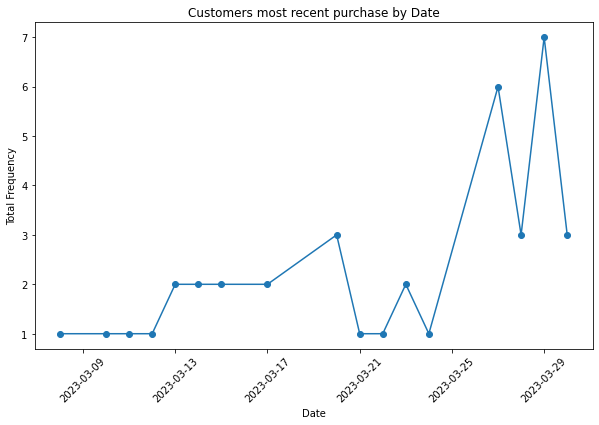

In [90]:
df_freq=df_most_recent.groupby('Most_recent_Purchase_date')['name'].size().reset_index()
# Create a scatter plot or line plot
plt.figure(figsize=(10, 6)) 

# Line plot
plt.plot(df_freq['Most_recent_Purchase_date'], df_freq['name'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.xticks(rotation=45)
plt.title('Customers most recent purchase by Date')

In [91]:
# Sort the DataFrame by date in descending order
df_sorted = combined_data_payment_completed.sort_values(by='date', ascending=True)

# Drop duplicates based on email column, keeping the first occurrence (most recent date)
df_unique = df_sorted.drop_duplicates(subset='name', keep='first')

# Create the DataFrame with 'name', 'email', and 'most_recent_date' columns
df_oldest_date = df_unique[['name', 'email', 'date']].rename(columns={'date': 'oldest_Purchase_date'})
# Print the resulting DataFrame

df_oldest_date=df_oldest_date.reset_index()
df_oldest_date.drop(columns='index')

,name,email,oldest_Purchase_date
0,parul kumar,2014parulkumar@gmail.com,2023-03-05
1,michelle baptist,michbaptist@gmail.com,2023-03-05
2,toral patel,toral@accordindia.net,2023-03-08
3,minu agrawal,minuagrawal0707@gmail.com,2023-03-08
4,jasma kapadia,jasmak999@yahoo.com,2023-03-08
5,dinmeher bunshah,anish24@gmail.com,2023-03-10
6,yogesh thakkar,yogesh.thakkar@gmail.com,2023-03-10
7,indrani jafar,ani.doley@gmail.com,2023-03-10
8,sonavi desai,sonavid@gmail.com,2023-03-10
9,heeral akhaury,heeral.akhaury@gmail.com,2023-03-11


In [92]:
name_amount=combined_data_payment_completed.groupby('name')['item payment amount(INR) '].sum().reset_index()
name_amount=name_amount.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
name_amount.drop(columns='index',inplace=True)
name_amount.head(10)

,name,item payment amount(INR)
0,padmashree,15480.0
1,michelle baptist,11784.0
2,parul kumar,11054.0
3,indrani jafar,10545.0
4,yogesh thakkar,10525.0
5,jasma kapadia,10420.0
6,sonavi desai,6520.0
7,anubha,6240.0
8,nidhi,4015.0
9,ami gumashta,3900.0


In [93]:
# Group data by 'name' and calculate the number of unique dates for each group
unique_days = combined_data_payment_completed.groupby('name')['date'].nunique().reset_index()

# Rename the column to 'unique_days'
unique_days=unique_days.sort_values(by='date',ascending=False)

unique_days = unique_days.rename(columns={'date': 'Number of times ordered this month','name':'Customer Name'})



unique_days


,Customer Name,Number of times ordered this month
26,parul kumar,8
11,indrani jafar,6
17,michelle baptist,5
7,coleen,3
12,jasma kapadia,3
24,padmashree,3
8,dinmeher bunshah,3
19,naina,3
35,sonavi desai,2
34,shwetha kallaje,2


In [95]:
df_sorted_amount=name_amount.sort_values(by='name')

df_sorted_amount = df_sorted_amount.rename(columns={'name':'Customer Name'})

unique_days=unique_days.sort_values(by='Customer Name')

merged_df = pd.merge(unique_days,df_sorted_amount, on='Customer Name', how='left')

merged_df['amount per order']=merged_df['item payment amount(INR) ']//merged_df['Number of times ordered this month']
df=merged_df.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
df.drop(columns='index',inplace=True)
df

,Customer Name,Number of times ordered this month,item payment amount(INR),amount per order
0,padmashree,3,15480.0,5160.0
1,michelle baptist,5,11784.0,2356.0
2,parul kumar,8,11054.0,1381.0
3,indrani jafar,6,10545.0,1757.0
4,yogesh thakkar,1,10525.0,10525.0
5,jasma kapadia,3,10420.0,3473.0
6,sonavi desai,2,6520.0,3260.0
7,anubha,2,6240.0,3120.0
8,nidhi,1,4015.0,4015.0
9,ami gumashta,1,3900.0,3900.0


In [96]:
top_customer=df.head(10)

top_customer_name=top_customer['Customer Name'].unique()

top_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(top_customer_name)]
top_customer_detail_grouped=top_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
top_customer_detail_grouped

,name,payment page title,item payment amount(INR)
0,ami gumashta,"DRYFRUITS, SEEDS, NUTS",3900.0
1,anubha,"DRYFRUITS, SEEDS, NUTS",2330.0
2,anubha,FRUIT BASKET,3910.0
3,indrani jafar,"DRYFRUITS, SEEDS, NUTS",4955.0
4,indrani jafar,FRUIT BASKET,2593.0
5,indrani jafar,HERBS & SALADS,1490.0
6,indrani jafar,"SALADS, EXOTIC VEGETABLES",910.0
7,indrani jafar,VEGETABLES,597.0
8,jasma kapadia,"DRYFRUITS, SEEDS, NUTS",6690.0
9,jasma kapadia,FRUIT BASKET,3730.0


In [106]:
pivot_table = pd.pivot_table(top_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# Rename the columns
pivot_table.columns = ['DRYFRUITS, SEEDS, NUTS', 'FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','HERBS & SALADS','VEGETABLES']

# Reset the index
pivot_table.reset_index(inplace=True)
pivot_table.fillna(0,inplace=True)
pivot_table['Total Amount(INR) '] = pivot_table['DRYFRUITS, SEEDS, NUTS']+pivot_table['VEGETABLES']+pivot_table['HERBS & SALADS']+pivot_table['FRUIT BASKET']+pivot_table['SALADS, EXOTIC VEGETABLES']
pivot_table=pivot_table.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
pivot_table.drop(columns='index',inplace=True)
pivot_table

,name,"DRYFRUITS, SEEDS, NUTS",FRUIT BASKET,"SALADS, EXOTIC VEGETABLES",HERBS & SALADS,VEGETABLES,Total Amount(INR)
0,padmashree,0.0,13200.0,0.0,2280.0,0.0,15480.0
1,michelle baptist,4935.0,5750.0,0.0,0.0,1099.0,11784.0
2,parul kumar,2000.0,7244.0,0.0,1235.0,575.0,11054.0
3,indrani jafar,4955.0,2593.0,1490.0,910.0,597.0,10545.0
4,yogesh thakkar,6280.0,4245.0,0.0,0.0,0.0,10525.0
5,jasma kapadia,6690.0,3730.0,0.0,0.0,0.0,10420.0
6,sonavi desai,0.0,6520.0,0.0,0.0,0.0,6520.0
7,anubha,2330.0,3910.0,0.0,0.0,0.0,6240.0
8,nidhi,0.0,4015.0,0.0,0.0,0.0,4015.0
9,ami gumashta,3900.0,0.0,0.0,0.0,0.0,3900.0


In [107]:
pivot_table_p=pivot_table
pivot_table_p['FRUIT BASKET(percentage) ']=round(pivot_table_p['FRUIT BASKET']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['DRYFRUITS, SEEDS, NUTS(percentage) ']=round(pivot_table_p['DRYFRUITS, SEEDS, NUTS']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['SALADS, EXOTIC VEGETABLES(percentage) ']=round(pivot_table_p['SALADS, EXOTIC VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)
pivot_table_p['VEGETABLES(percentage) ']=round(pivot_table_p['VEGETABLES']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p['HERBS & SALADS(percentage) ']=round(pivot_table_p['HERBS & SALADS']*100/pivot_table_p['Total Amount(INR) '],2)

pivot_table_p.drop(columns=['DRYFRUITS, SEEDS, NUTS','FRUIT BASKET','SALADS, EXOTIC VEGETABLES','HERBS & SALADS','VEGETABLES'],inplace=True)
pivot_table_p

,name,Total Amount(INR),FRUIT BASKET(percentage),"DRYFRUITS, SEEDS, NUTS(percentage)","SALADS, EXOTIC VEGETABLES(percentage)",VEGETABLES(percentage),HERBS & SALADS(percentage)
0,padmashree,15480.0,85.27,0.00,0.00,0.00,14.73
1,michelle baptist,11784.0,48.79,41.88,0.00,9.33,0.00
2,parul kumar,11054.0,65.53,18.09,0.00,5.20,11.17
3,indrani jafar,10545.0,24.59,46.99,14.13,5.66,8.63
4,yogesh thakkar,10525.0,40.33,59.67,0.00,0.00,0.00
5,jasma kapadia,10420.0,35.80,64.20,0.00,0.00,0.00
6,sonavi desai,6520.0,100.00,0.00,0.00,0.00,0.00
7,anubha,6240.0,62.66,37.34,0.00,0.00,0.00
8,nidhi,4015.0,100.00,0.00,0.00,0.00,0.00
9,ami gumashta,3900.0,0.00,100.00,0.00,0.00,0.00


In [108]:
# bottom_customer=df.tail(10)

# bottom_customer_name=bottom_customer['Customer Name'].unique()

# bottom_customer_detail=combined_data_payment_completed[combined_data_payment_completed['name'].isin(bottom_customer_name)]
# bottom_customer_detail_grouped=bottom_customer_detail.groupby(['name','payment page title'])['item payment amount(INR) '].sum().reset_index()
# bottom_customer_detail_grouped
# pivot_table_bottom = pd.pivot_table(bottom_customer_detail_grouped, values='item payment amount(INR) ', index='name', columns='payment page title', aggfunc='sum')

# # # Rename the columns
# pivot_table_bottom.columns = ['FRUIT BASKET', 'SALADS, EXOTIC VEGETABLES','VEGETABLES','HERBS & SALADS']

# # Reset the index
# pivot_table_bottom.reset_index(inplace=True)
# pivot_table_bottom.fillna(0,inplace=True)
# pivot_table_bottom['Total Amount(INR) '] = pivot_table_bottom['FRUIT BASKET']+pivot_table_bottom['VEGETABLES']+pivot_table_bottom['SALADS, EXOTIC VEGETABLES']+pivot_table_bottom['HERBS & SALADS']
# pivot_table_bottom=pivot_table_bottom.sort_values(by='Total Amount(INR) ',ascending=False).reset_index()
# pivot_table_bottom.drop(columns='index',inplace=True)
# pivot_table_bottom

In [109]:
top_customer_detail.groupby('name')['item name'].unique().reset_index()

,name,item name
0,ami gumashta,"[dried cranberries 500g, walnuts 500g, mixed seeds 250g, a2 gir cow ghee 500ml, honey awla 500g]"
1,anubha,"[kiwi box, raipur guava 1kg, pomegranate 1kg, watermelon, blueberries 2 box, fiji apples 1kg, mandarin mini oranges 1kg, delivery, walnuts 500g, flame red grapes 1 kg, mosumbi local 1kg]"
2,indrani jafar,"[red cherry tomatoes 250g, turkish cucumber 500g, snacking pepper 200g, parsley 50g, arugula 100g, yellow cherry tomatoes 250g, baby spinach 100g, delivery, devghad hapus 1doz, mamra badam 500g, p..."
3,jasma kapadia,"[blueberries 2 box, delivery, kiwi box, beauty pear 1kg, new zealand queen apples 1kg, makhana 250g, turkish apricot 200g, gourmet black rasins 500g, premium jumbo dates 500g, salted pista 500g, j..."
4,michelle baptist,"[devghad hapus 1doz, delivery, regular banana 1 doz, malta oranges 1kg, blueberries 2 box, new zealand queen apples 1kg, plain pista 500g, premium almonds 500g, cashews 500g, flame red grapes 1 kg..."
5,nidhi,"[mosumbi local 1kg, desi papaya 1pc, watermelon, mandarin mini oranges 1kg, flame red grapes 1 kg, devghad hapus 1doz, muskmelon 1pc, fiji apples 1kg, regular banana 1 doz, beauty pear 1kg, raipur..."
6,padmashree,"[japanese cucumber 500g, s summercrisp, s butterhead, s aragula, delivery, iceberg lettuce 1 pc, s lettuce mix, baby spinach, s romaine, devghad hapus 1doz]"
7,parul kumar,"[watermelon, sitafal 1kg, desi papaya 1pc, elaichi banana 1dozen, pomegranate 1kg, flame red grapes 1 kg, mosumbi local 1kg, beauty pear 1kg, muskmelon 1pc, delivery, makhana 250g, pine nuts 100g,..."
8,sonavi desai,"[devghad hapus 1doz, watermelon, mosumbi local 1kg, delivery, pomegranate 1kg, mandarin mini oranges 1kg, flame red grapes 1 kg, new zealand queen apples 1kg, fiji apples 1kg]"
9,yogesh thakkar,"[blueberries 2 box, pomegranate 1kg, delivery, devghad hapus 1doz, watermelon, avocados 2 pcs, mosumbi local 1kg, flame red grapes 1 kg, a2 gir cow ghee 500ml, cashews 1kg, golden rasins 500g, wal..."


In [110]:
top1=top_customer_detail.groupby('name')['item name'].unique().reset_index()
top2=top_customer_detail.groupby('name')['item payment amount(INR) '].sum().reset_index()
merged=pd.merge(top1,top2,on='name',how='left')
merged=merged.sort_values(by="item payment amount(INR) ",ascending=False).reset_index()
merged.drop(columns='index')

,name,item name,item payment amount(INR)
0,padmashree,"[japanese cucumber 500g, s summercrisp, s butterhead, s aragula, delivery, iceberg lettuce 1 pc, s lettuce mix, baby spinach, s romaine, devghad hapus 1doz]",15480.0
1,michelle baptist,"[devghad hapus 1doz, delivery, regular banana 1 doz, malta oranges 1kg, blueberries 2 box, new zealand queen apples 1kg, plain pista 500g, premium almonds 500g, cashews 500g, flame red grapes 1 kg...",11784.0
2,parul kumar,"[watermelon, sitafal 1kg, desi papaya 1pc, elaichi banana 1dozen, pomegranate 1kg, flame red grapes 1 kg, mosumbi local 1kg, beauty pear 1kg, muskmelon 1pc, delivery, makhana 250g, pine nuts 100g,...",11054.0
3,indrani jafar,"[red cherry tomatoes 250g, turkish cucumber 500g, snacking pepper 200g, parsley 50g, arugula 100g, yellow cherry tomatoes 250g, baby spinach 100g, delivery, devghad hapus 1doz, mamra badam 500g, p...",10545.0
4,yogesh thakkar,"[blueberries 2 box, pomegranate 1kg, delivery, devghad hapus 1doz, watermelon, avocados 2 pcs, mosumbi local 1kg, flame red grapes 1 kg, a2 gir cow ghee 500ml, cashews 1kg, golden rasins 500g, wal...",10525.0
5,jasma kapadia,"[blueberries 2 box, delivery, kiwi box, beauty pear 1kg, new zealand queen apples 1kg, makhana 250g, turkish apricot 200g, gourmet black rasins 500g, premium jumbo dates 500g, salted pista 500g, j...",10420.0
6,sonavi desai,"[devghad hapus 1doz, watermelon, mosumbi local 1kg, delivery, pomegranate 1kg, mandarin mini oranges 1kg, flame red grapes 1 kg, new zealand queen apples 1kg, fiji apples 1kg]",6520.0
7,anubha,"[kiwi box, raipur guava 1kg, pomegranate 1kg, watermelon, blueberries 2 box, fiji apples 1kg, mandarin mini oranges 1kg, delivery, walnuts 500g, flame red grapes 1 kg, mosumbi local 1kg]",6240.0
8,nidhi,"[mosumbi local 1kg, desi papaya 1pc, watermelon, mandarin mini oranges 1kg, flame red grapes 1 kg, devghad hapus 1doz, muskmelon 1pc, fiji apples 1kg, regular banana 1 doz, beauty pear 1kg, raipur...",4015.0
9,ami gumashta,"[dried cranberries 500g, walnuts 500g, mixed seeds 250g, a2 gir cow ghee 500ml, honey awla 500g]",3900.0


In [111]:
detail_item=top_customer_detail[top_customer_detail['name']=='padmashree'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,devghad hapus 1doz,13185.0,9
1,japanese cucumber 500g,480.0,6
2,baby spinach,440.0,4
3,iceberg lettuce 1 pc,340.0,4
4,s aragula,220.0,2
5,s butterhead,220.0,2
6,s lettuce mix,220.0,2
7,s summercrisp,220.0,2
8,s romaine,110.0,1
9,delivery,45.0,3


In [112]:
detail_item=top_customer_detail[top_customer_detail['name']=='yogesh thakkar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index').head(10)

,item name,item payment amount(INR),item quantity
0,walnuts 500g,2310.0,2
1,devghad hapus 1doz,1950.0,1
2,cashews 1kg,1500.0,1
3,a2 gir cow ghee 500ml,1050.0,1
4,premium almonds 500g,900.0,1
5,avocados 2 pcs,685.0,1
6,blueberries 2 box,600.0,1
7,golden rasins 500g,500.0,1
8,pomegranate 1kg,350.0,1
9,flame red grapes 1 kg,325.0,1


In [113]:
detail_item=top_customer_detail[top_customer_detail['name']=='michelle baptist'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,premium almonds 500g,2700.0,3
1,devghad hapus 1doz,2100.0,1
2,blueberries 2 box,1800.0,3
3,plain pista 500g,1415.0,1
4,cashews 500g,820.0,1
5,mandarin mini oranges 1kg,700.0,2
6,new zealand queen apples 1kg,400.0,1
7,flame red grapes 1 kg,325.0,1
8,regular banana 1 doz,200.0,2
9,malta oranges 1kg,180.0,1


In [114]:
detail_item=top_customer_detail[top_customer_detail['name']=='parul kumar'].groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()
detail_item_sort=detail_item.sort_values(by='item payment amount(INR) ',ascending=False).reset_index()
detail_item_sort.drop(columns='index')

,item name,item payment amount(INR),item quantity
0,watermelon,1240.0,8
1,makhana 250g,975.0,3
2,pomegranate 1kg,700.0,2
3,desi papaya 1pc,700.0,7
4,pine nuts 100g,690.0,1
5,avocados 2 pcs,685.0,1
6,flame red grapes 1 kg,650.0,2
7,imported blueberries 2punnets,600.0,1
8,blueberries 2 box,600.0,1
9,sitafal 1kg,520.0,2


### visualization

In [68]:
date_amount=combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()
date_amount.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR)
17,2023-01-24,17299.0
2,2023-01-04,13560.0
16,2023-01-23,12595.0
18,2023-01-26,9024.0
4,2023-01-08,8974.0
12,2023-01-17,8010.0
3,2023-01-05,6420.0
0,2023-01-02,5930.0
1,2023-01-03,5288.0
5,2023-01-09,5090.0


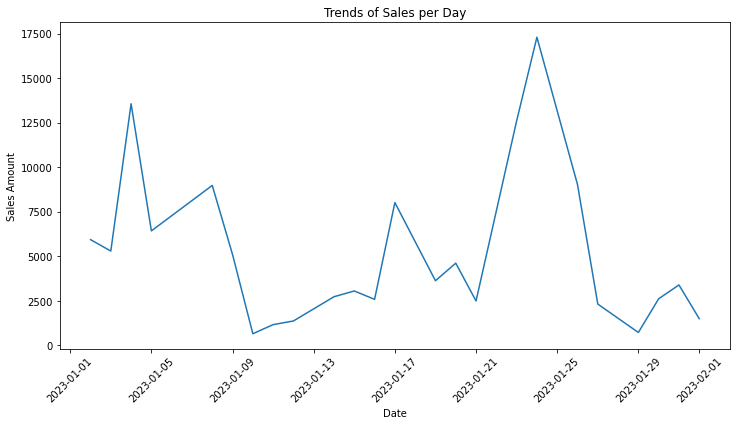

In [69]:
daily_sales = combined_data_payment_completed.groupby('date')['item payment amount(INR) '].sum().reset_index()


matplotlib.rcParams['figure.figsize']=(12,6)
plt.plot(daily_sales['date'], daily_sales['item payment amount(INR) '])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Trends of Sales per Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
combined_data_payment_completed['date']

0     2023-01-02
1     2023-01-02
2     2023-01-02
3     2023-01-02
4     2023-01-02
         ...    
446   2023-01-30
447   2023-01-30
448   2023-01-30
449   2023-01-30
450   2023-01-30
Name: date, Length: 451, dtype: datetime64[ns]

<Figure size 1440x2160 with 0 Axes>

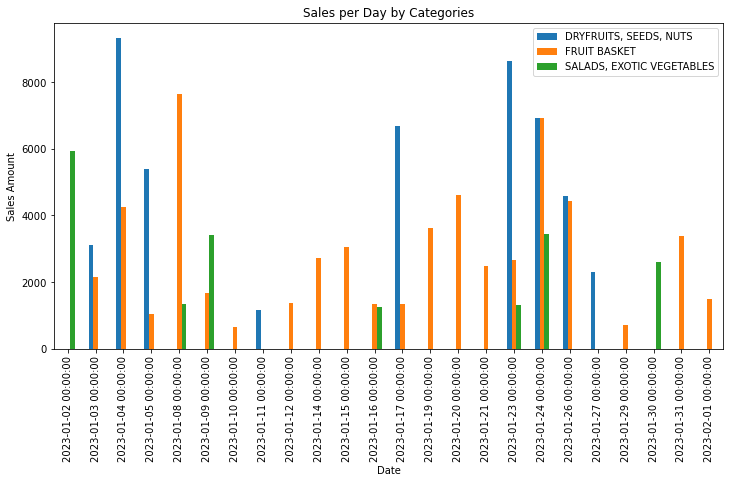

In [71]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item payment amount(INR) '].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item payment amount(INR) ')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()


this trend shows that on 21 june sales where heighest and fruit baskets where sold the most

<Figure size 1440x2160 with 0 Axes>

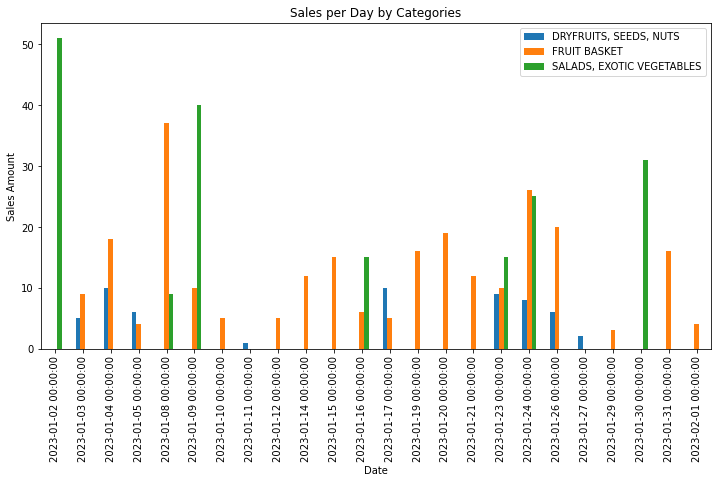

In [72]:
daily_category_sales = combined_data_payment_completed.groupby(['date', 'payment page title'])['item quantity'].sum().reset_index()

pivot_data =daily_category_sales.pivot(index='date', columns='payment page title', values='item quantity')

plt.figure(figsize=(20, 30))
pivot_data.plot(kind='bar', stacked=False)
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Sales per Day by Categories')
plt.legend()
plt.show()

This trend shows that on 15 june vegetables where sold in heighest quantity

### Dryfruits

In [73]:
pd.set_option('display.max_colwidth', 200)

In [74]:
dryfruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='DRYFRUITS, SEEDS, NUTS']
dryfruits_grouped=dryfruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()


In [75]:
dryfruits_unique_names=dryfruits.groupby('item name')['name'].unique().reset_index()

dryfruits_unique=dryfruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(dryfruits_unique,dryfruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,dryfruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount(INR) ','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount(INR),item sales quantity,buyers Name
0,a2 gir cow ghee 500ml,1,1050.0,1.0,[namita sahni]
1,brazil nuts 200g,2,1120.0,2.0,"[amirbanu virji, namita sahni]"
2,cashews 500g,5,4100.0,5.0,"[amirbanu virji, indrani jafar, namita sahni, ami gumashta, yogesh thakkar]"
3,dried cranberries 500g,2,1900.0,2.0,"[yogesh thakkar, dinmeher bunshah]"
4,golden rasins 500g,2,1000.0,2.0,"[yogesh thakkar, jasma kapadia]"
5,honey awla 500g,3,1080.0,3.0,"[yogesh thakkar, michelle baptist, ami gumashta]"
6,jumbo anjeer 500g,3,2970.0,3.0,"[yogesh thakkar, jasma kapadia, brinda upadhyaya]"
7,macadamia nuts 200g,1,925.0,1.0,[michelle baptist]
8,makhana 250g,2,975.0,3.0,"[yogesh thakkar, indrani jafar]"
9,mamra badam 500g,4,7120.0,4.0,"[dinmeher bunshah, indrani jafar, namita sahni, ami gumashta]"


Table shows information regarding dry fruits categories item name,buyers count,sales amount,item sales quantity,buyers Name

In [76]:
dryfruit_date=dryfruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_dryfruits=dryfruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(dryfruit_date,unique_dryfruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
1,2023-01-04,9320.0,"[mamra badam 500g, plain pista 500g, cashews 500g, brazil nuts 200g, prunes 250g, pecan nuts 200g, walnuts 500g, premium almonds 500g, dried cranberries 500g]"
5,2023-01-23,8620.0,"[macadamia nuts 200g, premium jumbo dates 500g, walnuts 500g, honey awla 500g, brazil nuts 200g, a2 gir cow ghee 500ml, cashews 500g, mamra badam 500g]"
6,2023-01-24,6925.0,"[turkish apricot 200g, walnuts 500g, mixed seeds 250g, honey awla 500g, mamra badam 500g, cashews 500g, jumbo anjeer 500g]"
4,2023-01-17,6680.0,"[premium almonds 500g, prunes 250g, jumbo anjeer 500g, golden rasins 500g, turkish apricot 200g, walnuts 500g]"
2,2023-01-05,5390.0,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
7,2023-01-26,4590.0,"[walnuts 500g, premium jumbo dates 500g, prunes 250g, mixed seeds 250g, cashews 500g]"
0,2023-01-03,3125.0,"[dried cranberries 500g, golden rasins 500g, jumbo anjeer 500g, honey awla 500g, makhana 250g]"
8,2023-01-27,2310.0,[walnuts 500g]
3,2023-01-11,1155.0,[walnuts 500g]


Dryfruits sales this month

### Fruits

In [77]:
fruits=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='FRUIT BASKET']
fruits_grouped=fruits.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

fruits_unique_names=fruits.groupby('item name')['name'].unique().reset_index()

fruits_unique=fruits.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(fruits_unique,fruits_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,fruits_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,6,7200.0,11.0,"[naina, yogesh thakkar, parul kumar, gayathri, jasma kapadia, dinmeher bunshah, nan]"
1,beauty pear 1kg,5,2400.0,8.0,"[parul kumar, indrani jafar, anubha, jasma kapadia, dinmeher bunshah]"
2,blueberries 2 box,11,9000.0,15.0,"[jaishankar vg, jasma kapadia, rachna jain, anubha, toral patel, gayathri, ushma, indrani jafar, simeen oshidar, dinmeher bunshah, asha gopalakrishnan, nan]"
3,delivery,20,555.0,37.0,"[naina, jaishankar vg, yogesh thakkar, jasma kapadia, rachna jain, mridula gupta, anubha, parul kumar, michelle baptist, kanchan samtani, toral patel, sonavi desai, indrani jafar, shwetha kallaje,..."
4,desi papaya 1pc,7,2100.0,21.0,"[naina, mridula gupta, parul kumar, sonavi desai, shwetha kallaje, ushma, dinmeher bunshah]"
5,elaichi banana 1dozen,3,472.0,4.0,"[parul kumar, dinmeher bunshah, naina]"
6,indian apples 1kg,5,1920.0,8.0,"[naina, mridula gupta, gayathri, dinmeher bunshah, yogesh thakkar]"
7,kiwi box,7,2600.0,13.0,"[jasma kapadia, rachna jain, anubha, toral patel, smita vats sharma, gayathri, dinmeher bunshah]"
8,malta oranges 1kg,8,1776.0,12.0,"[yogesh thakkar, anubha, toral patel, gayathri, sonavi desai, naina, dinmeher bunshah, asha gopalakrishnan]"
9,mosumbi local 1kg,5,1485.0,9.0,"[yogesh thakkar, mridula gupta, gayathri, kanchan samtani, dinmeher bunshah]"


In [78]:
fruits_date=fruits.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_fruits=fruits.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(fruits_date,unique_fruits, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
3,2023-01-08,7636.0,"[raipur guava 1kg, mosumbi local 1kg, desi papaya 1pc, strawberries 1 box, nagpur oranges 1kg, delivery, indian apples 1kg, pomegranate 1kg, blueberries 2 box, malta oranges 1kg, kiwi box, new zea..."
15,2023-01-24,6931.0,"[new zealand queen apples 1kg, delivery, blueberries 2 box, beauty pear 1kg, avocados 2 pcs, kiwi box, pineapple, red grapes 500g, watermelon, elaichi banana 1dozen, desi papaya 1pc, regular banan..."
12,2023-01-20,4608.0,"[elaichi banana 1dozen, beauty pear 1kg, pomegranate 1kg, sitafal 1kg, new zealand queen apples 1kg, avocados 2 pcs, raipur guava 1kg, delivery, desi papaya 1pc, kiwi box, strawberries 1 box]"
16,2023-01-26,4434.0,"[muskmelon 1pc, desi papaya 1pc, delivery, new zealand queen apples 1kg, strawberries 1 box, malta oranges 1kg, avocados 2 pcs, indian apples 1kg, red grapes 500g, sitafal 1kg, mosumbi local 1kg, ..."
1,2023-01-04,4240.0,"[avocados 2 pcs, nagpur oranges 1kg, delivery, desi papaya 1pc, regular banana 1 doz, pomegranate 1kg, indian apples 1kg, strawberries 1 box, blueberries 2 box, kiwi box, muskmelon 1pc]"
11,2023-01-19,3621.0,"[mosumbi local 1kg, indian apples 1kg, malta oranges 1kg, strawberries 1 box, delivery, avocados 2 pcs, kiwi box, pomegranate 1kg, sitafal 1kg, blueberries 2 box, desi papaya 1pc, regular banana 1..."
18,2023-01-31,3384.0,"[indian apples 1kg, watermelon, elaichi banana 1dozen, avocados 2 pcs, strawberries 1 box, pomegranate 1kg, malta oranges 1kg, delivery, desi papaya 1pc, red grapes 500g, new zealand queen apples ..."
8,2023-01-15,3045.0,"[sitafal 1kg, strawberries 1 box, delivery, kiwi box, avocados 2 pcs, pomegranate 1kg, nagpur oranges 1kg, watermelon, desi papaya 1pc, regular banana 1 doz, indian apples 1kg]"
7,2023-01-14,2723.0,"[beauty pear 1kg, elaichi banana 1dozen, pomegranate 1kg, sitafal 1kg, raipur guava 1kg, nagpur oranges 1kg, delivery, desi papaya 1pc, avocados 2 pcs, new zealand queen apples 1kg]"
14,2023-01-23,2660.0,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g, pomegranate 1kg]"


### Vegetables

In [79]:
Vegetables=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='VEGETABLES']
Vegetables_grouped=Vegetables.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

Vegetables_unique_names=Vegetables.groupby('item name')['name'].unique().reset_index()

Vegetables_unique=Vegetables.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(Vegetables_unique,Vegetables_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,Vegetables_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,buyers count,sales amount,item sales quantity,item name,buyers Name


In [80]:
Vegetables_date=Vegetables.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_Vegetables=Vegetables.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(Vegetables_date,unique_Vegetables, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,item payment amount(INR),date,item name


### Exotic vegetables

In [81]:
exotic_vegies=combined_data_payment_completed[combined_data_payment_completed['payment page title']=='SALADS, EXOTIC VEGETABLES']
exotic_vegies_grouped=exotic_vegies.groupby('item name')['item payment amount(INR) ','item quantity'].sum().reset_index()

exotic_vegies_unique_names=exotic_vegies.groupby('item name')['name'].unique().reset_index()

exotic_vegies_unique=exotic_vegies.groupby('item name')['name'].nunique().reset_index()

merged_df = pd.merge(exotic_vegies_unique,exotic_vegies_grouped, on='item name', how='left')

merged_df = pd.merge(merged_df,exotic_vegies_unique_names, on='item name', how='left')

merged_df = merged_df.rename(columns={'name_x': 'buyers count','name_y':'buyers Name','item payment amount(INR) ':'sales amount','item quantity':'item sales quantity'})
merged_df

,item name,buyers count,sales amount,item sales quantity,buyers Name
0,avocados 2 pcs,4,2550.0,4.0,"[kanchan samtani, indrani jafar, toral patel, dinmeher bunshah]"
1,baby spinach,4,660.0,6.0,"[indrani jafar, shradha goenka, parvin dumasia, dinmeher bunshah]"
2,babybella mushroom 2packs,3,525.0,3.0,"[toral patel, dinmeher bunshah, kerbi patel]"
3,babycorn 1pack,4,390.0,6.0,"[trupti, michelle baptist, dinmeher bunshah, ashish billimoria]"
4,broccoli 1pc,7,680.0,8.0,"[kerbi patel, jasma kapadia, indrani jafar, naina, shradha goenka, madhu, dinmeher bunshah]"
5,button white mushroom 2packs,4,700.0,5.0,"[jasma kapadia, michelle baptist, dinmeher bunshah, naina]"
6,celery 250g,4,280.0,4.0,"[trupti, naina, dinmeher bunshah, kerbi patel]"
7,cherry tomatoes 250g,7,850.0,10.0,"[kanchan samtani, indrani jafar, naina, shradha goenka, toral patel, parvin dumasia, dinmeher bunshah]"
8,delivery,16,495.0,33.0,"[kerbi patel, trupti, kanchan samtani, meenal, ashish billimoria, jasma kapadia, dinmeher bunshah, michelle baptist, indrani jafar, abha mehta, naina, shradha goenka, madhu, toral patel, parvin du..."
9,green zucchini 1pc,2,170.0,2.0,"[dinmeher bunshah, ashish billimoria]"


In [82]:
exotic_vegies_date=exotic_vegies.groupby('date')['item payment amount(INR) '].sum().reset_index()
unique_exotic_vegies=exotic_vegies.groupby('date')['item name'].unique().reset_index()

merged_df = pd.merge(exotic_vegies_date,unique_exotic_vegies, on='date', how='left')
merged_df.sort_values(by='item payment amount(INR) ',ascending=False)

,date,item payment amount(INR),item name
0,2023-01-02,5930.0,"[broccoli 1pc, delivery, purple cabbage 1 pc, s romaine, red yellow capsicum 1pc, s swiss chard, s curl kale, s spicy mix, imported blueberries 2punnets, iceberg lettuce 1 pc, celery 250g, babycor..."
5,2023-01-24,3443.0,"[purple cabbage 1 pc, japanese cucumber 500g, green zucchini 1pc, s lettuce mix, yellow zucchini 1pc, s aragula, s curl kale, s summercrisp, delivery, cherry tomatoes 250g, s spicy mix, italian ba..."
2,2023-01-09,3405.0,"[s summercrisp, s butterhead, button white mushroom 2packs, italian basil, delivery, s spicy mix, s lettuce mix, cherry tomatoes 250g, red yellow capsicum 1pc, broccoli 1pc, celery 250g, baby spin..."
6,2023-01-30,2608.0,"[babycorn 1pack, s butterhead, s summercrisp, delivery, japanese cucumber 500g, celery 250g, s curl kale, s swiss chard, red yellow capsicum 1pc, babybella mushroom 2packs, s aragula, iceberg lett..."
1,2023-01-08,1338.0,"[cherry tomatoes 250g, red yellow capsicum 1pc, avocados 2 pcs, iceberg lettuce 1 pc, purple cabbage 1 pc, babybella mushroom 2packs, delivery, italian basil]"
4,2023-01-23,1315.0,"[delivery, s lettuce mix, s aragula, cherry tomatoes 250g, baby spinach, s romaine]"
3,2023-01-16,1245.0,"[baby spinach, cherry tomatoes 250g, s aragula, s spicy mix, delivery, s romaine, s lettuce mix, s summercrisp, s butterhead]"


In [83]:
combined_data_payment_completed['name'].unique()

array(['kerbi patel', 'trupti', 'kanchan samtani', 'meenal',
       'ashish billimoria', 'jasma kapadia', 'dinmeher bunshah',
       'michelle baptist', 'indrani jafar', 'naina', 'jaishankar vg',
       'yogesh thakkar', 'rachna jain', 'amirbanu virji', 'mridula gupta',
       'anubha', 'parul kumar', 'toral patel', 'sonavi desai',
       'shwetha kallaje', 'abha mehta', 'shradha goenka', 'madhu',
       'namita sahni', 'ami gumashta', 'brinda upadhyaya',
       'smita vats sharma', 'gayathri', 'ushma', 'parvin dumasia',
       'meher mirza', 'simeen oshidar', 'asha gopalakrishnan', nan],
      dtype=object)

#### Indrani's data 

In [84]:
indrani_data=combined_data_payment_completed[combined_data_payment_completed['name']=='indrani jafar']
indrani_data_grouped=indrani_data.groupby('item name')['item quantity','item payment amount(INR) '].sum().reset_index()
indrani_data_grouped.sort_values(by='item payment amount(INR) ',ascending=False)

,item name,item quantity,item payment amount(INR)
10,mamra badam 500g,1.0,1780.0
20,salted pista 500g,1.0,1450.0
5,cashews 500g,1.0,820.0
0,avocados 2 pcs,1.0,700.0
12,pine nuts 100g,1.0,690.0
9,makhana 250g,2.0,650.0
21,strawberries 1 box,3.0,615.0
3,blueberries 2 box,1.0,600.0
8,japanese cucumber 500g,4.0,320.0
2,beauty pear 1kg,1.0,300.0


In [85]:
indrani_orders = combined_data_payment_completed[(combined_data_payment_completed['name'] == 'indrani jafar')]



indrani_order_dates = indrani_orders.groupby('date')['item name'].unique().reset_index()
indrani_order_dates

,date,item name
0,2023-01-02,"[cherry tomatoes 250g, avocados 2 pcs, delivery, broccoli 1pc, japanese cucumber 500g]"
1,2023-01-05,"[cashews 500g, mamra badam 500g, makhana 250g, salted pista 500g, pine nuts 100g]"
2,2023-01-09,"[beauty pear 1kg, delivery, strawberries 1 box, nagpur oranges 1kg, raipur guava 1kg, broccoli 1pc, baby spinach, s romaine, s aragula, purple cabbage 1 pc, s butterhead, red yellow capsicum 1pc, ..."
3,2023-01-23,"[blueberries 2 box, strawberries 1 box, delivery, red grapes 500g]"


In [86]:
combined_data_payment_completed[combined_data_payment_completed['name']=='yogesh thakkar']

,payment page title,payment date,order_id,item name,item amount,item quantity,item payment amount(INR),total payment amount,email,date,time,year,day,month,name
60,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,strawberries 1 box,215.0,2.0,430.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
61,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,delivery,15.0,1.0,15.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
62,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,sitafal 1kg,260.0,1.0,260.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
63,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,mosumbi local 1kg,165.0,1.0,165.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
64,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,avocados 2 pcs,650.0,1.0,650.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
65,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,pomegranate 1kg,350.0,1.0,350.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
66,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,nagpur oranges 1kg,145.0,1.0,145.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
67,FRUIT BASKET,03/01/2023 22:01:07,order_Kzls1e5ZIhuMrt,malta oranges 1kg,148.0,1.0,148.0,2163.0,yogesh.thakkar@gmail.com,2023-01-03,22:01:07,2023,3,1,yogesh thakkar
85,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,dried cranberries 500g,950.0,1.0,950.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar
86,"DRYFRUITS, SEEDS, NUTS",03/01/2023 21:58:12,order_Kzlosb1Dp5Z33k,golden rasins 500g,500.0,1.0,500.0,3125.0,yogesh.thakkar@gmail.com,2023-01-03,21:58:12,2023,3,1,yogesh thakkar


# END